## Continuous & Continuous

In [1]:
import math
import sklearn
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
data = {'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
        'insomnia':['Y','N','N','N','N','N','Y','Y','Y','N','Y','N','N','N','N','N','Y','Y','Y','N'],
        'age':[23,40,5,30,1,40,16,27,43,8,23,39,5,29,1,42,13,29,41,10],
        'height':[180,170,100,176,70,160,170,166,155,35,170,168,101,175,72,163,169,163,151,40],
        'weight':[100,68,20,70,10,45,50,58,58,17,101,65,22,79,12,40,53,52,56,14]}

data = pd.DataFrame(data)
display(data)

,sex,insomnia,age,height,weight
0,Male,Y,23,180,100
1,Male,N,40,170,68
2,Male,N,5,100,20
3,Male,N,30,176,70
4,Male,N,1,70,10
5,Female,N,40,160,45
6,Female,Y,16,170,50
7,Female,Y,27,166,58
8,Female,Y,43,155,58
9,Female,N,8,35,17


In [3]:
corr = stats.pearsonr(data['height'], data['weight'])[0]
corr

0.8380879580762449

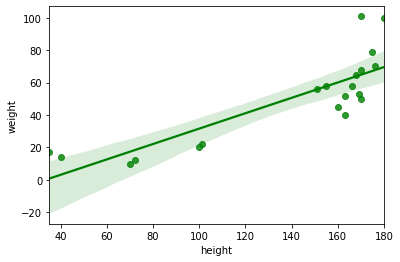

In [4]:
g = sns.regplot(x="height", y="weight", color="g", data=data)

## Discrete & Discrete

In [5]:
import researchpy   

contTable = pd.crosstab(data['sex'], data['insomnia'])
contTable

insomnia,N,Y
sex,,
Female,4,6
Male,8,2


In [6]:
# Calculate the df
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [7]:
crosstab, res = researchpy.crosstab(data['sex'], data['insomnia'], test='chi-square')
print(res)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.3333
1                    p-value =    0.0679
2               Cramer's phi =    0.4082


In [8]:
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

'medium'

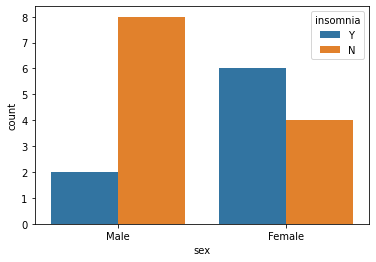

In [9]:
g= sns.countplot(x="sex", hue="insomnia", data=data)

## Discrete & Continuous

In [10]:
import pingouin as pg

# SS-total = SS-between + SS-within
# Index 0 is SS-between, index 1 is SS-within
aov = pg.anova(dv='weight', between='insomnia', data=data, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,insomnia,3630.0,1,3630.000000,6.123137,0.023521,0.253828
1,Within,10671.0,18,592.833333,NaN,NaN,NaN


In [11]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.2538284036081393

In [12]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)

judgment_etaSq(etaSq)

'Large'

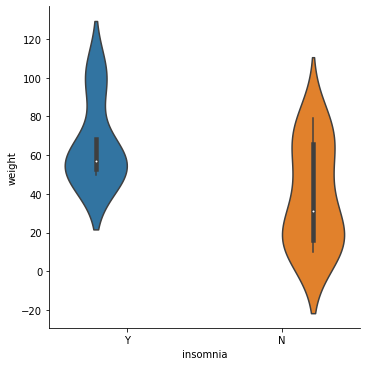

In [13]:
g = sns.catplot(x="insomnia", y="weight", hue="insomnia", data=data, kind="violin")